In [1]:
import numpy as np 
import pandas as pd
import time, warnings
import datetime as dt

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

In [4]:
warnings.filterwarnings("ignore")

In [5]:
#load the dataset
telecom_df = pd.read_csv('D:/RFM/Telecom_RFM.csv',sep=',', parse_dates=['CALL_STA_TIME'])
telecom_df.head()

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED
0,1.202000e+09,2/9/2017 19:13,534.0
1,1.202000e+09,2/14/2017 17:00,1454.0
2,1.202000e+09,2/1/2017 6:47,415.0
3,1.202000e+09,2/15/2017 10:25,0.0
4,1.202000e+09,2/14/2017 16:20,0.0


In [6]:
# Create a unique id for each observation
telecom_df["id"] = telecom_df.index + 1

In [7]:
telecom_df.head()

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED,id
0,1.202000e+09,2/9/2017 19:13,534.0,1
1,1.202000e+09,2/14/2017 17:00,1454.0,2
2,1.202000e+09,2/1/2017 6:47,415.0,3
3,1.202000e+09,2/15/2017 10:25,0.0,4
4,1.202000e+09,2/14/2017 16:20,0.0,5


In [8]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72084 entries, 0 to 72083
Data columns (total 4 columns):
CALLING_ISDN      59900 non-null float64
CALL_STA_TIME     72084 non-null object
CREDIT_CHARGED    59598 non-null float64
id                72084 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ MB


In [13]:
telecom_df['CALL_STA_TIME'] = pd.to_datetime(telecom_df['CALL_STA_TIME'], errors ="ignore")

In [14]:
telecom_df.head()

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED,id
0,1.202000e+09,2/9/2017 19:13,534.0,1
1,1.202000e+09,2/14/2017 17:00,1454.0,2
2,1.202000e+09,2/1/2017 6:47,415.0,3
3,1.202000e+09,2/15/2017 10:25,0.0,4
4,1.202000e+09,2/14/2017 16:20,0.0,5


In [15]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72084 entries, 0 to 72083
Data columns (total 4 columns):
CALLING_ISDN      59900 non-null float64
CALL_STA_TIME     72084 non-null object
CREDIT_CHARGED    59598 non-null float64
id                72084 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ MB


In [16]:
print(telecom_df['CALL_STA_TIME'].min(), telecom_df['CALL_STA_TIME'].max())

1.423611111 2/9/2017 9:58


In [17]:
telecom_df['CALL_STA_TIME'] = pd.to_datetime(telecom_df['CALL_STA_TIME'], errors ="ignore")

In [18]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72084 entries, 0 to 72083
Data columns (total 4 columns):
CALLING_ISDN      59900 non-null float64
CALL_STA_TIME     72084 non-null object
CREDIT_CHARGED    59598 non-null float64
id                72084 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.2+ MB


In [19]:
telecom_df['CALL_STA_TIME'] = pd.to_datetime(telecom_df['CALL_STA_TIME'], errors='coerce')

In [20]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72084 entries, 0 to 72083
Data columns (total 4 columns):
CALLING_ISDN      59900 non-null float64
CALL_STA_TIME     72074 non-null datetime64[ns]
CREDIT_CHARGED    59598 non-null float64
id                72084 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 MB


In [21]:
# Set the most recent date
sd = dt.datetime(2017,2,15)

In [23]:
telecom_df['hist']=sd - telecom_df['CALL_STA_TIME']
telecom_df['hist'].astype('timedelta64[D]')
telecom_df['hist']=telecom_df['hist'] / np.timedelta64(1, 'D')
telecom_df.head()

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED,id,hist
0,1.202000e+09,2017-02-09 19:13:00,534.0,1,5.199306
1,1.202000e+09,2017-02-14 17:00:00,1454.0,2,0.291667
2,1.202000e+09,2017-02-01 06:47:00,415.0,3,13.717361
3,1.202000e+09,2017-02-15 10:25:00,0.0,4,-0.434028
4,1.202000e+09,2017-02-14 16:20:00,0.0,5,0.319444


In [24]:
#Create a RFM table
rfmTable = telecom_df.groupby('CALLING_ISDN').agg({'hist': lambda x:x.min(), # Recency
                                        'CALLING_ISDN': lambda x: len(x),               # Frequency
                                        'CREDIT_CHARGED': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'CALLING_ISDN': 'frequency', 
                         'CREDIT_CHARGED': 'monetary_value'}, inplace=True)

In [25]:
telecom_df.head()

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED,id,hist
0,1.202000e+09,2017-02-09 19:13:00,534.0,1,5.199306
1,1.202000e+09,2017-02-14 17:00:00,1454.0,2,0.291667
2,1.202000e+09,2017-02-01 06:47:00,415.0,3,13.717361
3,1.202000e+09,2017-02-15 10:25:00,0.0,4,-0.434028
4,1.202000e+09,2017-02-14 16:20:00,0.0,5,0.319444


In [26]:
rfmTable.head()

,recency,frequency,monetary_value
CALLING_ISDN,,,
0.0,42778.041667,81.0,0.0
1.0,42778.002778,192.0,0.0
3.0,42778.957639,1.0,26.0
4.0,42778.431250,1.0,0.0
5.0,42778.221528,3.0,0.0


In [33]:
telecom_df[telecom_df['CALLING_ISDN']==0.0]

,CALLING_ISDN,CALL_STA_TIME,CREDIT_CHARGED,id,hist
902,0.0,1900-01-01 11:08:00,NaN,903,42778.536111
1134,0.0,1900-01-01 14:16:00,NaN,1135,42778.405556
1155,0.0,1900-01-01 20:53:00,NaN,1156,42778.129861
1156,0.0,1900-01-01 20:53:00,NaN,1157,42778.129861
9947,0.0,1900-01-01 10:50:00,NaN,9948,42778.548611
9948,0.0,1900-01-01 10:50:00,NaN,9949,42778.548611
9949,0.0,1900-01-01 10:50:00,NaN,9950,42778.548611
9950,0.0,1900-01-01 10:50:00,NaN,9951,42778.548611
9951,0.0,1900-01-01 10:50:00,NaN,9952,42778.548611
9952,0.0,1900-01-01 10:50:00,NaN,9953,42778.548611


In [34]:
#Create 25%, 50%, 75% quartiles for RFM scores
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

           recency  frequency  monetary_value
0.25  42778.957639        1.0          1547.0
0.50  42778.957639        1.0         13680.0
0.75  42778.957639        2.0         36383.0 <class 'pandas.core.frame.DataFrame'>


In [35]:
quartiles=quartiles.to_dict()
quartiles

{'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'monetary_value': {0.25: 1547.0, 0.5: 13680.0, 0.75: 36383.0},
 'recency': {0.25: 42778.95763888889,
  0.5: 42778.95763888889,
  0.75: 42778.95763888889}}

In [36]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [37]:
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    

In [38]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [39]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [40]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CALLING_ISDN,,,,,,,
0.0,42778.041667,81.0,0.0,1,1,4,114
1.0,42778.002778,192.0,0.0,1,1,4,114
3.0,42778.957639,1.0,26.0,1,4,4,144
4.0,42778.431250,1.0,0.0,1,4,4,144
5.0,42778.221528,3.0,0.0,1,1,4,114


In [41]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CALLING_ISDN,,,,,,,
1.205202e+09,-0.995833,1840.0,515410.0,1,1,1,111
1.205224e+09,-0.857639,400.0,319266.0,1,1,1,111
3.793000e+03,42778.957639,4.0,296611.0,1,1,1,111
3.551000e+03,42778.957639,3.0,265672.0,1,1,1,111
1.206815e+09,-0.887500,1137.0,248653.0,1,1,1,111
1.263000e+03,42778.957639,3.0,241107.0,1,1,1,111
1.202409e+09,-0.941667,335.0,235108.0,1,1,1,111
1.202330e+09,-0.995833,823.0,220861.0,1,1,1,111
1.232000e+04,42778.536111,4.0,217350.0,1,1,1,111


In [42]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111     91328.338028
112     23369.052632
113      6771.221519
114       261.812834
121     98768.786982
122     24271.000000
123      7532.073529
124       151.986667
141     84077.343182
142     22612.327416
143      6880.995215
144       147.701754
411    140028.000000
421     88660.250000
422     28862.000000
441     79085.793333
442     21667.544444
443     10228.491228
444        46.818182
Name: monetary_value, dtype: float64

In [44]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3641 entries, 0.0 to 1207649076.0
Data columns (total 8 columns):
recency           3640 non-null float64
frequency         3641 non-null float64
monetary_value    3641 non-null float64
R_Quartile        3641 non-null int64
F_Quartile        3641 non-null int64
M_Quartile        3641 non-null int64
RFMClass          3641 non-null object
Total Score       3641 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ KB
                   recency  frequency  monetary_value  R_Quartile  F_Quartile  \
CALLING_ISDN                                                                    
0.0           42778.041667       81.0             0.0           1           1   
1.0           42778.002778      192.0             0.0           1           1   
3.0           42778.957639        1.0            26.0           1           4   
4.0           42778.431250        1.0             0.0           1           4   
5.0           42778.2

In [45]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     91328.338028
4     65562.943709
5     13031.304878
6     54159.768678
7     20652.764407
8      6950.887122
9     15386.715573
10    21667.544444
11    10228.491228
12       46.818182
Name: monetary_value, dtype: float64

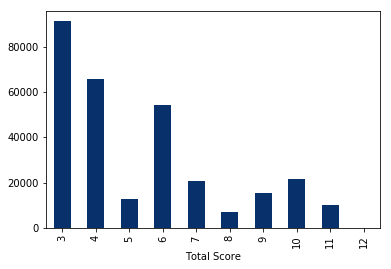

In [46]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')